In [4]:
#Imports
# also requires openpyxl : pip install pandas xlrd openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
# Getting Lie Waves Data

#Getting Band_Pass Preprocessed data
band_pass_df = {}
patient_number = 1
while patient_number < 28:
    band_pass_df[f'patient_{patient_number}_exp_1'] = pd.read_csv(f'LieWaves/Preprocessing/1_BandPass_Filtered/S{patient_number}S1.csv')
    band_pass_df[f'patient_{patient_number}_exp_2'] = pd.read_csv(f'LieWaves/Preprocessing/1_BandPass_Filtered/S{patient_number}S2.csv')
    patient_number += 1


## Getting ASR Preprocessed data
asr_df = {}
patient_number = 1
while patient_number < 28:
    asr_df[f'patient_{patient_number}_exp_1'] = pd.read_csv(f'LieWaves/Preprocessing/2_ASR/S{patient_number}S1.csv')
    asr_df[f'patient_{patient_number}_exp_2'] = pd.read_csv(f'LieWaves/Preprocessing/2_ASR/S{patient_number}S2.csv')
    patient_number += 1


# Getting ICA preprocessed Data
ica_df = {}
patient_number = 1
while patient_number < 28:
    ica_df[f'patient_{patient_number}_exp_1'] = pd.read_csv(f'LieWaves/Preprocessing/3_ICA/S{patient_number}S1.csv')
    ica_df[f'patient_{patient_number}_exp_2'] = pd.read_csv(f'LieWaves/Preprocessing/3_ICA/S{patient_number}S2.csv')
    patient_number += 1

    
atar_df = {}
patient_number = 1
while patient_number < 28:
    atar_df[f'patient_{patient_number}_exp_1'] = pd.read_csv(f'LieWaves/Preprocessing/4_ATAR/S{patient_number}S1.csv')
    atar_df[f'patient_{patient_number}_exp_2'] = pd.read_csv(f'LieWaves/Preprocessing/4_ATAR/S{patient_number}S2.csv')
    patient_number += 1

# Getting subject stimulus data
subject_stimulus_df = pd.read_excel('LieWaves/Subject_Stimuli.xlsx')


{'patient_1_exp_1':        EEG.AF3   EEG.T7    EEG.Pz    EEG.T8   EEG.AF4
 0    -23.06646 -3.41870  -4.71324  -3.49983 -31.21507
 1    -63.18020 -3.45809 -10.15932  -4.01336 -84.79472
 2    -55.29086  1.47982  -8.71857   3.85157 -68.47845
 3    -33.60319 -0.11376   1.54304  12.84844 -32.75923
 4    -16.70038  1.77705   4.69570  23.00879 -20.66515
 ...        ...      ...       ...       ...       ...
 9595 -43.44511 -7.87958 -30.83626 -25.90855 -43.05452
 9596 -30.69336 -2.76699 -26.64395 -28.47860 -42.41805
 9597 -18.97347  2.33321 -22.16092 -20.87520 -33.99572
 9598 -17.43383  0.35830 -10.43255 -13.22796 -15.05033
 9599 -13.23044 -4.57416 -14.00820  -1.41507  -4.99372
 
 [9600 rows x 5 columns],
 'patient_1_exp_2':         EEG.AF3    EEG.T7    EEG.Pz    EEG.T8   EEG.AF4
 0      56.71860   8.81117   1.93497   2.59074  36.50065
 1     115.74863  13.32584   3.25176   2.90858  72.93312
 2      76.65674   0.22618   1.69930  -4.84548  45.12300
 3      49.13279   5.34182   0.29239  -4.13338

In [11]:
# Getting Real-Life_Deception Data
gestures_df = pd.read_csv('Real-life_Deception_Detection_2016/Annotation/All_Gestures_Deceptive and Truthful.csv')
gestures_df

,id,OtherGestures,Smile,Laugh,Scowl,otherEyebrowMovement,Frown,Raise,OtherEyeMovements,Close-R,...,forwardHead,downRHead,singleHand,bothHands,otherHandM,complexHandM,sidewaysHand,downHands,upHands,class
0,trial_lie_001.mp4,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,deceptive
1,trial_lie_002.mp4,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,deceptive
2,trial_lie_003.mp4,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,deceptive
3,trial_lie_004.mp4,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,deceptive
4,trial_lie_005.mp4,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,deceptive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,trial_truth_056.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,truthful
117,trial_truth_057.mp4,1,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,truthful
118,trial_truth_058.mp4,1,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,truthful
119,trial_truth_059.mp4,0,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,truthful


In [12]:
# Changing the class to match other data set's classification
gestures_df.loc[gestures_df['class'] == 'deceptive', 'class'] = 0
gestures_df.loc[gestures_df['class'] == 'truthful', 'class'] = 1
gestures_df

,id,OtherGestures,Smile,Laugh,Scowl,otherEyebrowMovement,Frown,Raise,OtherEyeMovements,Close-R,...,forwardHead,downRHead,singleHand,bothHands,otherHandM,complexHandM,sidewaysHand,downHands,upHands,class
0,trial_lie_001.mp4,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,trial_lie_002.mp4,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,trial_lie_003.mp4,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,trial_lie_004.mp4,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,trial_lie_005.mp4,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,trial_truth_056.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
117,trial_truth_057.mp4,1,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
118,trial_truth_058.mp4,1,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
119,trial_truth_059.mp4,0,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1


In [20]:
from scipy.stats import ttest_ind

# Choose gesture
gesture = "openMouth"

# Extract values for each class
truthful_vals = gestures_df[gestures_df["class"] == 1][gesture]
deceptive_vals = gestures_df[gestures_df["class"] == 0][gesture]

# Perform two-sample t-test
t_stat, p_val = ttest_ind(truthful_vals, deceptive_vals, equal_var=False)

print(f"Hypothesis Test for Gesture: '{gesture}'")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4e}")

if p_val < 0.05:
    print("Result: Reject the null hypothesis (significant difference).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference).")


Hypothesis Test for Gesture: 'openMouth'
T-statistic: 1.8807
P-value: 6.2548e-02
Result: Fail to reject the null hypothesis (no significant difference).


In [22]:
from scipy.stats import ttest_ind

gesture = "lipsDown"

truthful_vals = gestures_df[gestures_df["class"] == 1][gesture]
deceptive_vals = gestures_df[gestures_df["class"] == 0][gesture]

t_stat, p_val = ttest_ind(truthful_vals, deceptive_vals, equal_var=False)

print(f"Hypothesis Test for Gesture: '{gesture}'")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4e}")

if p_val < 0.05:
    print("Result: Reject the null hypothesis (significant difference).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference).")


Hypothesis Test for Gesture: 'lipsDown'
T-statistic: 4.1709
P-value: 6.2217e-05
Result: Reject the null hypothesis (significant difference).


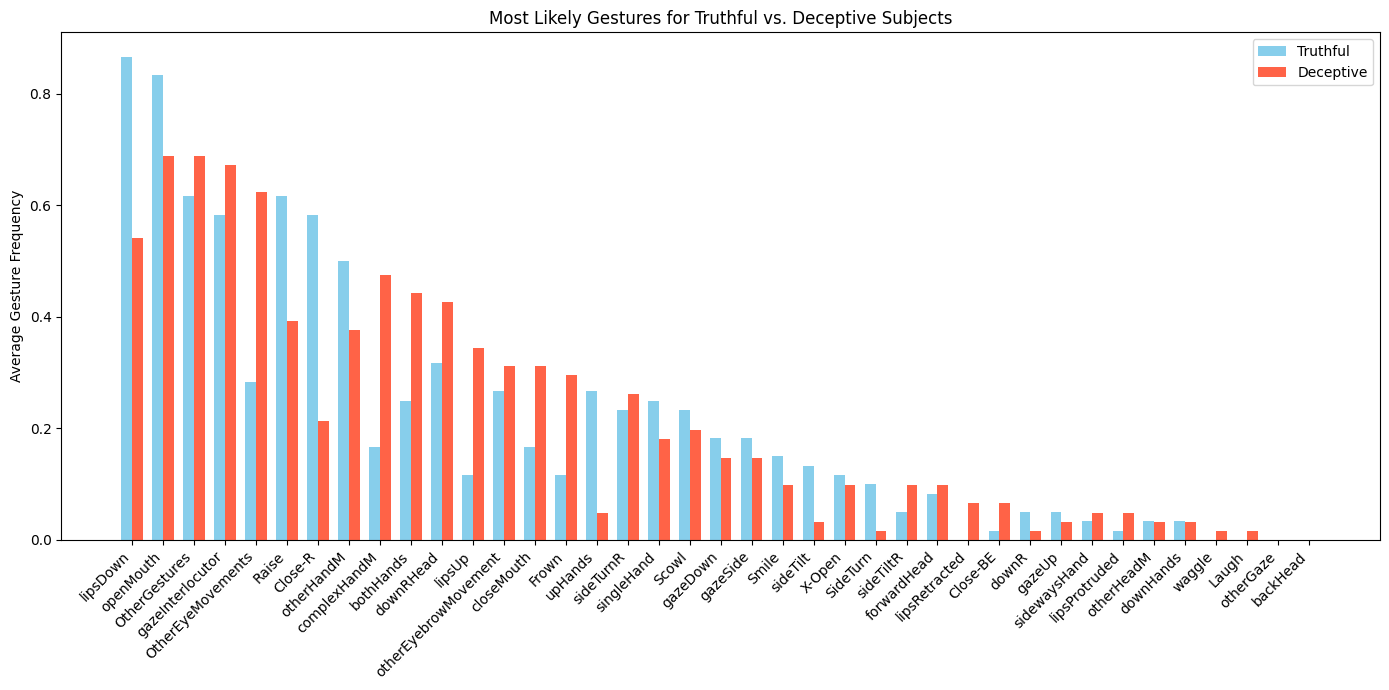

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Get gesture columns only (exclude non-gesture fields)
gesture_cols = [col for col in gestures_df.columns if col not in ["file", "class", "id"]]

# Ensure all gesture values are numeric
gestures_df[gesture_cols] = gestures_df[gesture_cols].apply(pd.to_numeric, errors="coerce")

# Compute average frequency of gestures for each class
truthful_means = gestures_df[gestures_df["class"] == 1][gesture_cols].mean()
deceptive_means = gestures_df[gestures_df["class"] == 0][gesture_cols].mean()

# Combine into a DataFrame for easier plotting
gesture_comparison = pd.DataFrame({
    "Truthful": truthful_means,
    "Deceptive": deceptive_means
}).dropna()

# Sort by max value across both to order most likely gestures
gesture_comparison["Max"] = gesture_comparison.max(axis=1)
gesture_comparison = gesture_comparison.sort_values("Max", ascending=False).drop("Max", axis=1)

# Plot
x = np.arange(len(gesture_comparison))
width = 0.35

plt.figure(figsize=(14, 7))
plt.bar(x - width/2, gesture_comparison["Truthful"], width, label="Truthful", color="skyblue")
plt.bar(x + width/2, gesture_comparison["Deceptive"], width, label="Deceptive", color="tomato")

plt.xticks(x, gesture_comparison.index, rotation=45, ha="right")
plt.ylabel("Average Gesture Frequency")
plt.title("Most Likely Gestures for Truthful vs. Deceptive Subjects")
plt.legend()
plt.tight_layout()
plt.show()


Conclusion:
